In [1]:
!pip install sklearn

In [2]:
# 라이브러리 불러오기

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [3]:
bmi = pd.read_csv("bmi_500.csv")

In [4]:
bmi

,Gender,Height,Weight,Label
0,Male,174,96,Obesity
1,Male,189,87,Normal
2,Female,185,110,Obesity
3,Female,195,104,Overweight
4,Male,149,61,Overweight
...,...,...,...,...
495,Female,150,153,Extreme Obesity
496,Female,184,121,Obesity
497,Female,141,136,Extreme Obesity
498,Male,150,95,Extreme Obesity


In [5]:
gender = []
for i in bmi['Gender']:
    if i == "Male":
        gender.append(1)
    else:
        gender.append(0)
bmi["Gender"] = gender
bmi

,Gender,Height,Weight,Label
0,1,174,96,Obesity
1,1,189,87,Normal
2,0,185,110,Obesity
3,0,195,104,Overweight
4,1,149,61,Overweight
...,...,...,...,...
495,0,150,153,Extreme Obesity
496,0,184,121,Obesity
497,0,141,136,Extreme Obesity
498,1,150,95,Extreme Obesity


In [6]:
bmi = pd.read_csv('bmi_500.csv', index_col='Label')
# 산점도를 표시하는 함수를 만들어보자~!
def myScatter(label, color) :
    # 원하는 레이블값을 인덱싱
    tmp = bmi.loc[label]
    # scatter : 산점도로 표시하는 명령
    plt.scatter(tmp['Weight'],     # x축 데이터 설정
                tmp['Height'],     # y축 데이터 설정
                c = color,         # 색상을 결정하는 명령
                label = label      # label로 설정하는 명령
                )

In [7]:
bmi.index.unique()

Index(['Obesity', 'Normal', 'Overweight', 'Extreme Obesity', 'Weak',
       'Extremely Weak'],
      dtype='object', name='Label')

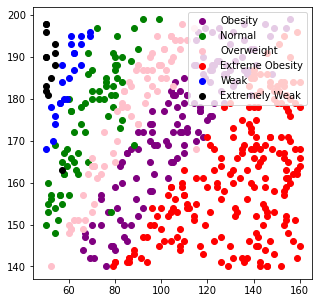

In [8]:
plt.figure(figsize = (5, 5))

myScatter("Obesity", "purple")
myScatter("Normal", "green")
myScatter("Overweight", "pink")
myScatter("Extreme Obesity", "red")
myScatter("Weak", "blue")
myScatter("Extremely Weak", "black")

plt.legend(loc = "upper right")

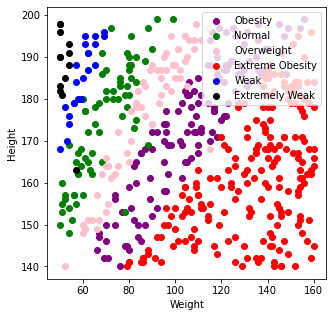

In [9]:
plt.figure(figsize = (5, 5))

myScatter("Obesity", "purple")
myScatter("Normal", "green")
myScatter("Overweight", "pink")
myScatter("Extreme Obesity", "red")
myScatter("Weak", "blue")
myScatter("Extremely Weak", "black")

plt.legend(loc = "upper right")
plt.xlabel("Weight")
plt.ylabel("Height")
plt.show()

In [10]:
bmi = pd.read_csv("bmi_500.csv")
bmi

,Gender,Height,Weight,Label
0,Male,174,96,Obesity
1,Male,189,87,Normal
2,Female,185,110,Obesity
3,Female,195,104,Overweight
4,Male,149,61,Overweight
...,...,...,...,...
495,Female,150,153,Extreme Obesity
496,Female,184,121,Obesity
497,Female,141,136,Extreme Obesity
498,Male,150,95,Extreme Obesity


In [11]:
gender = []
for i in bmi['Gender']:
    if i == "Male":
        gender.append(1)
    else:
        gender.append(0)
bmi["Gender"] = gender
bmi

,Gender,Height,Weight,Label
0,1,174,96,Obesity
1,1,189,87,Normal
2,0,185,110,Obesity
3,0,195,104,Overweight
4,1,149,61,Overweight
...,...,...,...,...
495,0,150,153,Extreme Obesity
496,0,184,121,Obesity
497,0,141,136,Extreme Obesity
498,1,150,95,Extreme Obesity


In [12]:
# 독립변수와 종속변수 구분

X = bmi.loc[:, "Height":"Weight"] # 인덱스 전부 다, 컬럼은 다 불러와줘
y = bmi.loc[:, "Label"] # 인덱스 전부 다, 그 중에 컬럼은 Label인 컬럼만 불러와줘


In [13]:
print(X.shape)
print(y.shape)

(500, 2)
(500,)


In [14]:
# train-test split

X_train = X.iloc[:350, :]
y_train = y.loc[:349]

X_test = X.iloc[350:, :]
y_test = y.iloc[350:]

In [15]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(350, 2)
(350,)
(150, 2)
(150,)


In [16]:
model = KNeighborsClassifier(n_neighbors= 10)
# model = DecisionTreeClassifier()

In [17]:
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [18]:
prediction = model.predict(X_test)
prediction

array(['Normal', 'Normal', 'Normal', 'Extreme Obesity', 'Extremely Weak',
       'Obesity', 'Obesity', 'Extreme Obesity', 'Weak', 'Extreme Obesity',
       'Weak', 'Extreme Obesity', 'Extreme Obesity', 'Obesity',
       'Extreme Obesity', 'Extreme Obesity', 'Overweight', 'Obesity',
       'Extreme Obesity', 'Obesity', 'Overweight', 'Extreme Obesity',
       'Weak', 'Normal', 'Obesity', 'Extreme Obesity', 'Extreme Obesity',
       'Extreme Obesity', 'Extreme Obesity', 'Overweight',
       'Extreme Obesity', 'Weak', 'Obesity', 'Extreme Obesity',
       'Extreme Obesity', 'Normal', 'Extreme Obesity', 'Obesity',
       'Overweight', 'Normal', 'Normal', 'Normal', 'Normal', 'Overweight',
       'Extreme Obesity', 'Overweight', 'Overweight', 'Extreme Obesity',
       'Overweight', 'Extreme Obesity', 'Overweight', 'Obesity', 'Normal',
       'Obesity', 'Obesity', 'Extreme Obesity', 'Normal',
       'Extreme Obesity', 'Extreme Obesity', 'Extreme Obesity', 'Weak',
       'Obesity', 'Extreme Obes